<a href="https://colab.research.google.com/github/PriyeshRaoBK/PriyeshRaoBK/blob/main/Bank_Personal_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context:**

# This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customersare liability customers (depositors) with varying sizes of deposits. The number of customers who arealso borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# **Objective:**

# The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# **Dataset Description:**

# The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# 1. Import the required libraries and read the dataset.

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
#import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#reading data frame
file_path = '/content/drive/MyDrive/Almabetter/Bank_Personal_Loan_Modelling.csv'
df=pd.read_csv(file_path)

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [7]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
df.shape

(5000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant.

In [10]:
df.duplicated().any()

False

# NO duplicate rows

# 4. Display the Five Point Summary and write your key findings.

In [11]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Average age is 45 years, Work Experince is 20 years, Average Income 73 thousans dolars.
Education, Perosnal loan, Securities account, CD account, Online, Credit Card are categorical column. Indiacated as  0 (False)  and 1 (True).
Average spending on credit card is 1937 dollarand max is 10 thousand dollars Family size 2.3. max family size is 4.
Average house mortgage is 101.71 thousand dollars. Max 635 thousand dollars.
Minimum Income is 8 thousand dollars.
There is negative term in Experince which should be deleted.


# 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:.abs function)

In [12]:
df[df['Experience']< 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [13]:
df["Experience"] = df["Experience"].abs()
df["Experience"]

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [14]:
df[df['Experience']< 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Converted negative values into positive values

# 6. Get the target column distribution and comment on the class distribution.

Text(0, 0.5, 'Count')

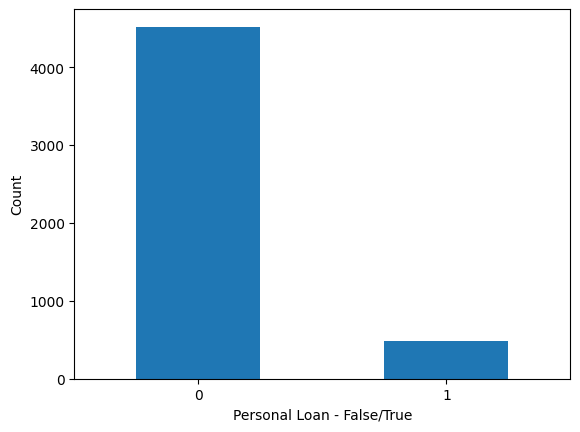

In [15]:
#df['Personal Loan	'].pyplot.bar
df['Personal Loan'].value_counts().plot(kind='bar', rot = 0)
plt.xlabel('Personal Loan - False/True')
plt.ylabel('Count')

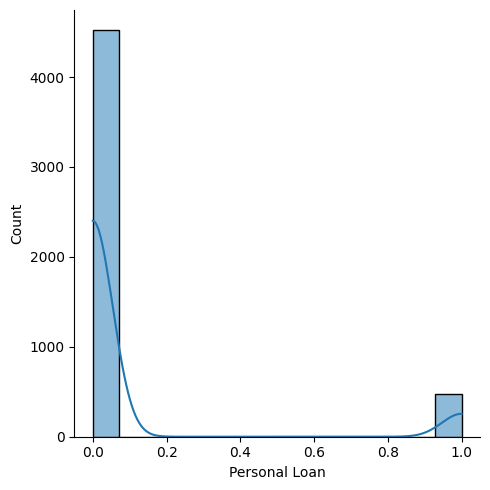

In [16]:
sns.displot(df['Personal Loan'],kde = True)
plt.show()

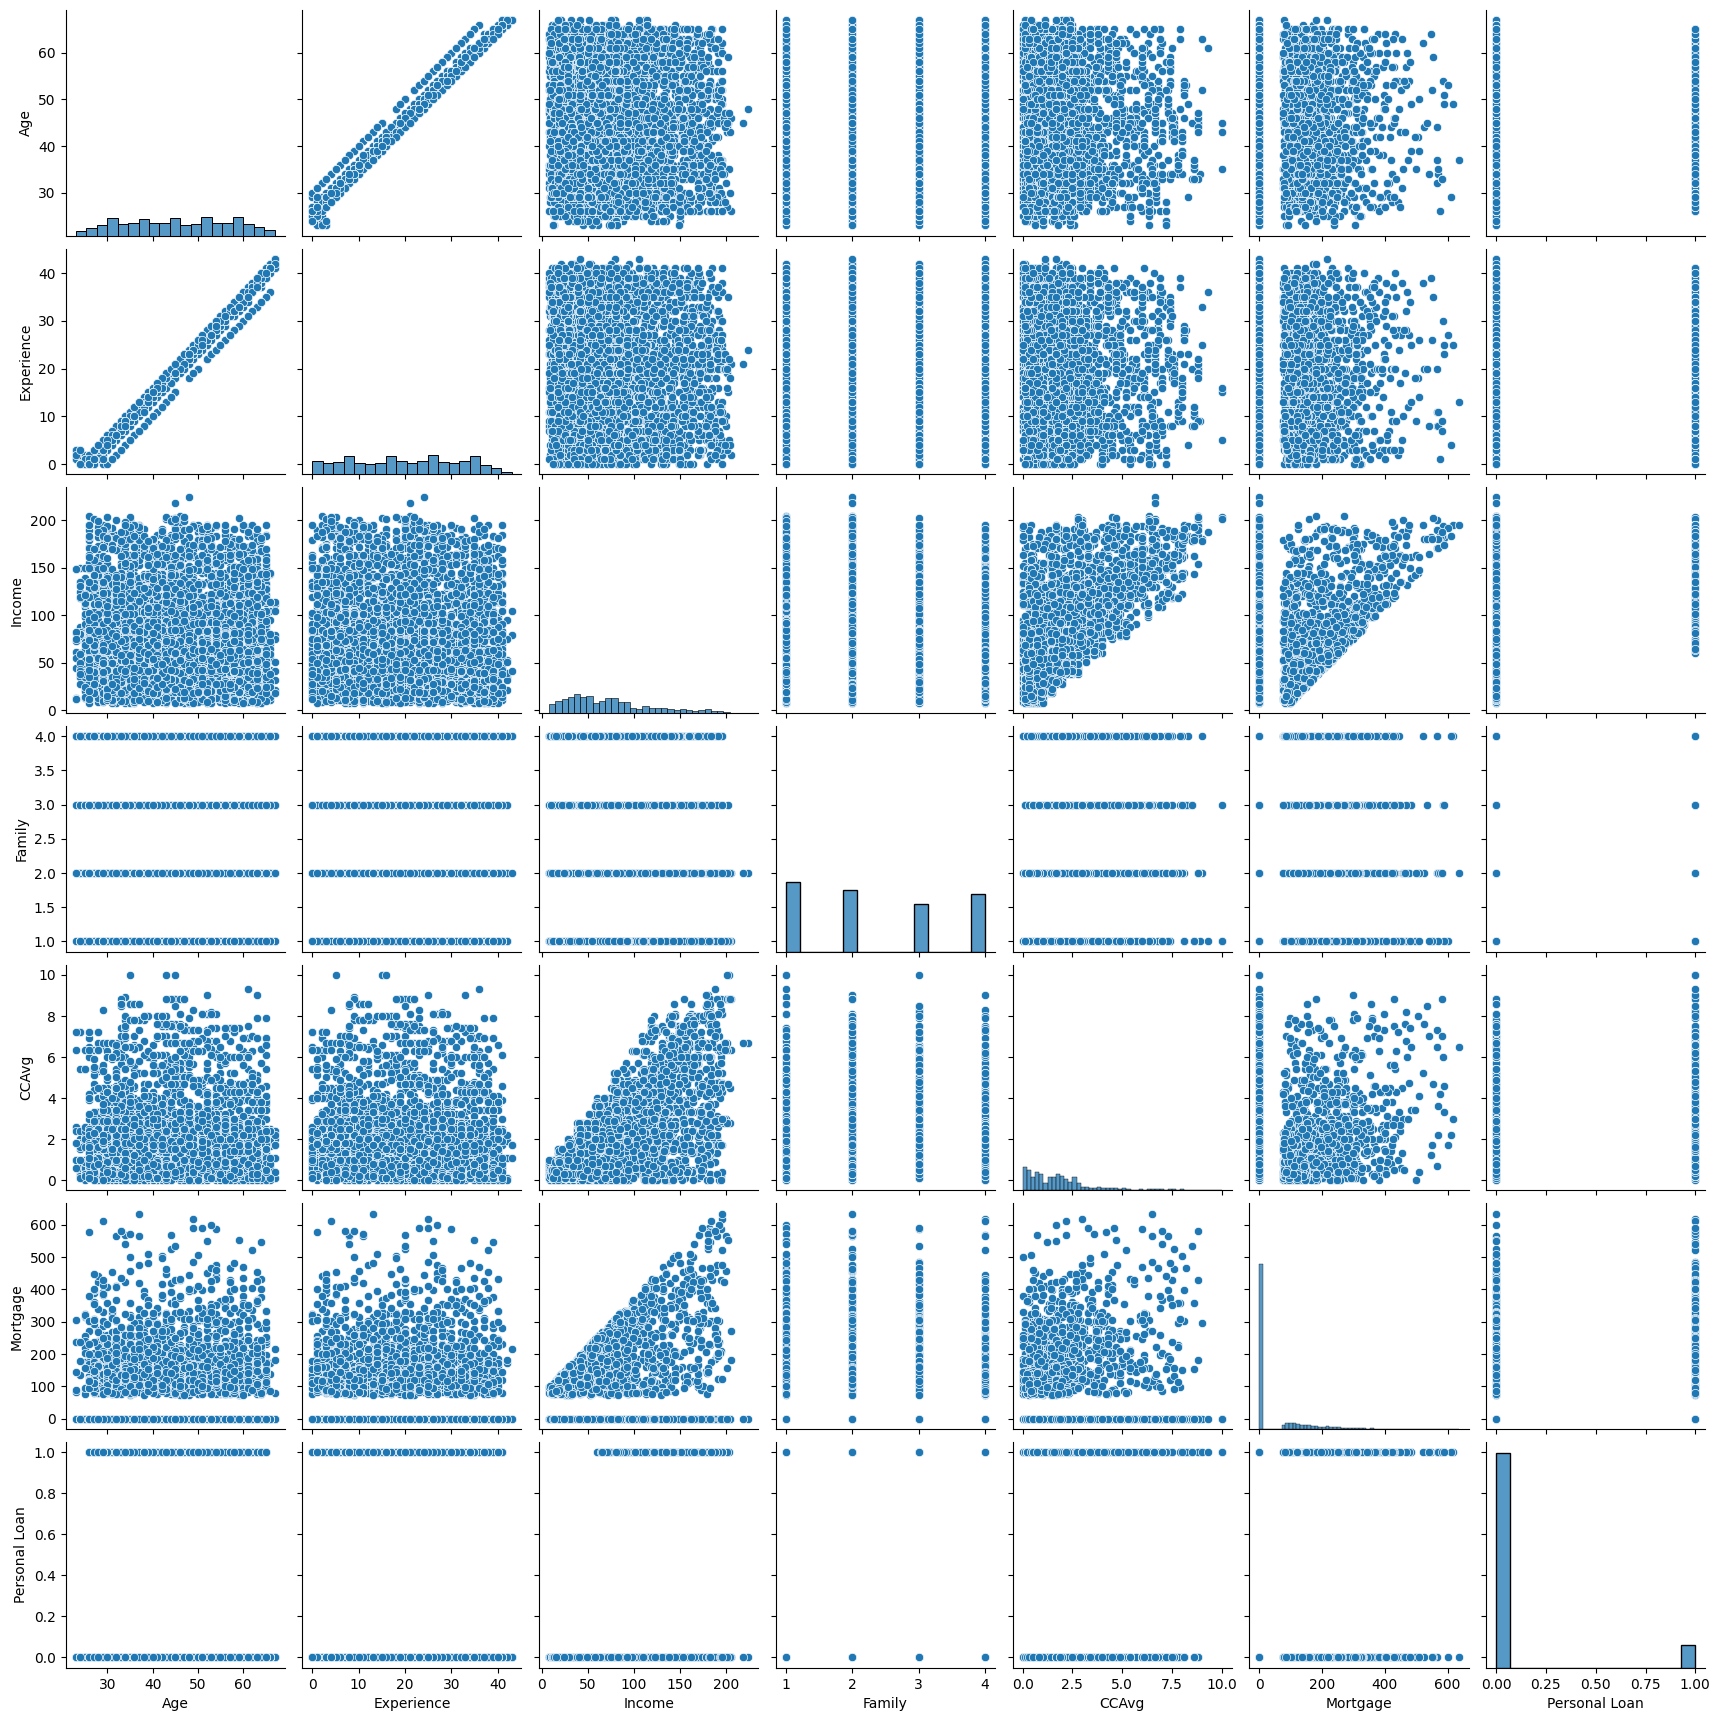

In [17]:
sns.pairplot(data = df, vars = ['Age','Experience','Income', 'Family','CCAvg', 'Mortgage', 'Personal Loan' ])

There is no much information availavle from pair plot regarding personal loan
From bar chart majority of people have not taken any loan Around 900 peopl eonly taken loan from 5000.

# 7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the Xvariable.

In [18]:
X = df.drop('Personal Loan', axis = 1) # Copy all the predictor variables into X dataframe
y = df[['Personal Loan']] # Copy target into the y dataframe.

# 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [19]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

# 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buyingpersonal loans. Display the train and test accuracy scores.

In [20]:
# Create an instance
log_reg = LogisticRegression()
# Learning
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [22]:
# Print the intercept of the model and the coefficients of the features
print('Intercept of the logistic model fitted is: ',log_reg.intercept_)
print('Coefficients of the features are: ',log_reg.coef_)

Intercept of the logistic model fitted is:  [-0.00178547]
Coefficients of the features are:  [[-4.94635789e-06 -5.87192808e-03 -4.26184274e-02  3.66253753e-02
  -7.08048055e-05  2.58564433e-01  1.44446802e-01  2.79592164e-01
  -1.04194223e-04  9.03686344e-03  7.82391671e-02 -3.18137414e-03
  -1.15785042e-03]]


In [23]:
# Check for accuray of the model
metrics.accuracy_score(y_test,y_pred)

0.9133333333333333

# 10. Print the confusion matrix and classification report for the model and write your conclusions on the results.

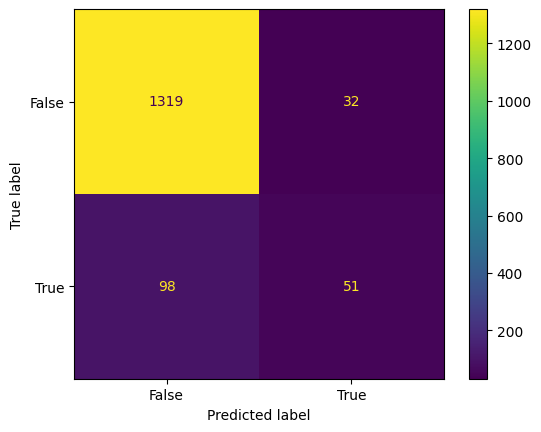

In [24]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [25]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.61      0.34      0.44       149

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



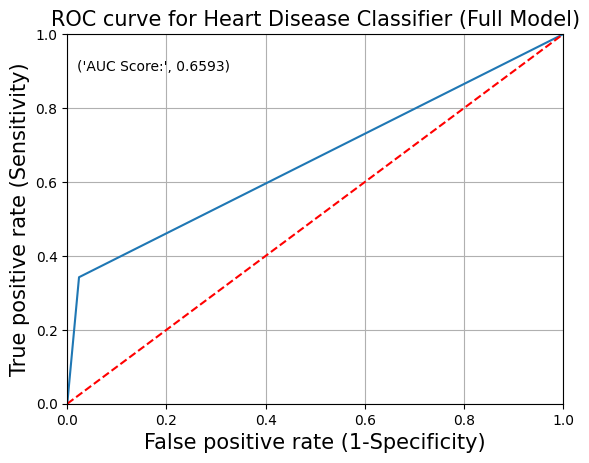

In [26]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

# We see that accuracy is 0.91, but recall, f1-score for class-1 is  good 0 class but for 1 class is lhaving low recall, precision and f1 score value. Over ralll the model is quite good.
# Precision measures the proportion of true positives (i.e., instances classified as positive that are actually positive) out of all instances classified as positive. In this case, the precision for class 0 is 0.93, which means that when the model classified an instance as 0, it was correct 93% of the time. The precision for class 1 is 0.61, which means that when the model classified an instance as 1, it was correct 61% of the time.
# New section
# Recall measures the proportion of true positives out of all actual positives. In this case, the recall for class 0 is 0.98, which means that when an instance was actually 0, the model correctly identified it as 0 98% of the time. The recall for class 1 is 0.34, which means that when an instance was actually 1, the model correctly identified it as 1 only 34% of the time.

# F1-score is the harmonic mean of precision and recall, and provides a single measure of performance that balances precision and recall. The F1-score for class 0 is 0.95, and for class 1 it is 0.44.
# AUC score of 0.653 is better than random guessing, but it suggests that the model's ability to correctly classify positive and negative instances is only slightly better than chance. Depending on the specific problem being addressed, an AUC score of 0.653 may or may not be considered a "good" result.